<h1 style= "text-align : center;border: 1px solid purple; border-radius : 20px; padding :20px; ">Iris flower classification</h1>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


# Projects Settings

In [7]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']
colors = ['#003049', '#D62828', '#F77F00', '#FCBF49', '#EAE2B7']

# Exploring the dataset

## Loading the data

In [9]:
iris = pd.read_csv('IRIS.csv')

In [10]:
iris.sample()

sepal_length  sepal_width  petal_length  petal_width          species
51           6.4          3.2           4.5          1.5  Iris-versicolor

## Understanding the data

In [12]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

we notice that our dataset consist of 4 features for the flower, and one column to determine the speacie or category of the flower.

So that means we have labelled dataset on which we can use classification models.

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The `info()` method of a Pandas DataFrame tells us that the DataFrame has:

* **150 rows:** This is the number of data points in your dataset.
* **5 columns:** These columns likely represent features of your data.
* **Data types:**
    * The first four columns (sepal_length, sepal_width, petal_length, petal_width) are of type `float64`, which means they contain numerical data.
    * The fifth column (species) is of type `object`, which means it contains categorical data (likely text labels).

Overall, this output suggests we're working with a dataset of 150 samples, each described by four numerical features and a categorical label. 

In [15]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

1. **Sepal Length:** The Iris flowers in this dataset have an average sepal length of 5.84 cm. There's a decent spread in the data though, with a standard deviation of 0.83 cm. The smallest sepal measured 4.3 cm and the largest was 7.9 cm.

2. **Sepal Width:** The average sepal width is slightly less than the length at 3.05 cm. Similar to the length, there's some variation with a standard deviation of 0.43 cm. Sepal widths range between 2.0 cm and 4.4 cm.

3. **Petal Length:** Petal length shows a greater range compared to the sepals. The average petal is 3.76 cm long, but the standard deviation is 1.76 cm. The shortest petal measured 1.0 cm and the longest was 6.9 cm.

4. **Petal Width:** The average petal width is the smallest at 1.20 cm. The data also has the highest standard deviation here at 0.76 cm. Petal widths range from a mere 0.1 cm to 2.5 cm.

## Cleaning the dataset

In [20]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

    No missing values!

In [21]:
iris.duplicated().sum()

3

    Three rows are duplicated, we may need to drop those duplicated rows

In [22]:
iris.drop_duplicates(inplace = True)

In [24]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Now our dataset is reading for more exloratary data analysis, visualisation and classification

# Visualisation


## Distribution of iris species

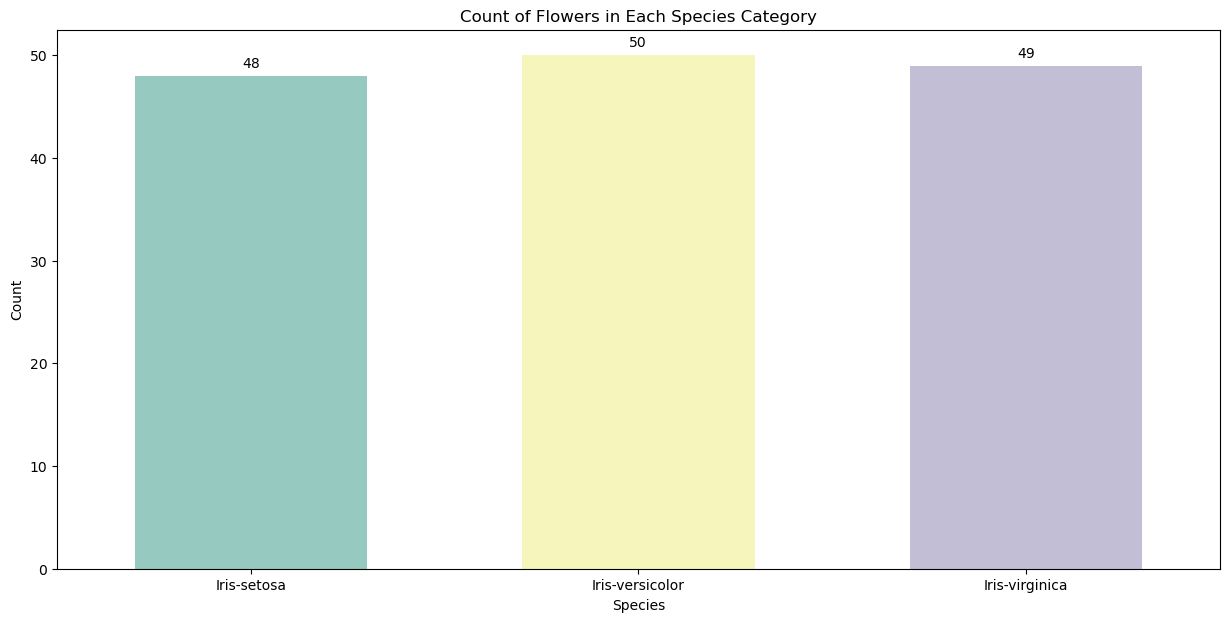

In [83]:
plt.figure(figsize=(15, 7))

# Plot the count of flowers in each category of species
ax = sns.countplot(data=iris, x='species', palette='Set3', width=0.6)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Count of Flowers in Each Species Category')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


## Measured lengths and withds by the species

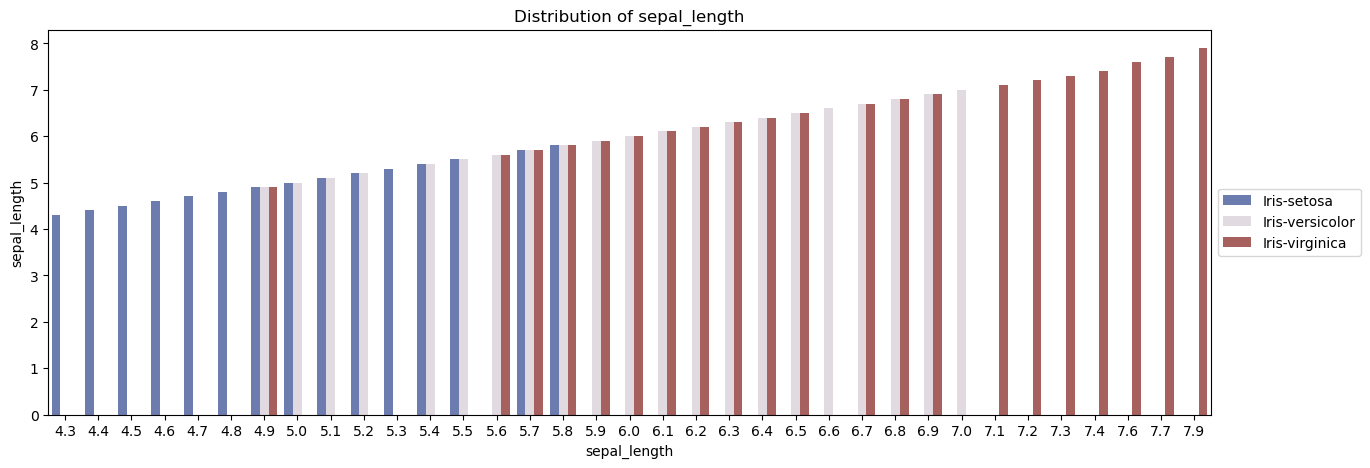

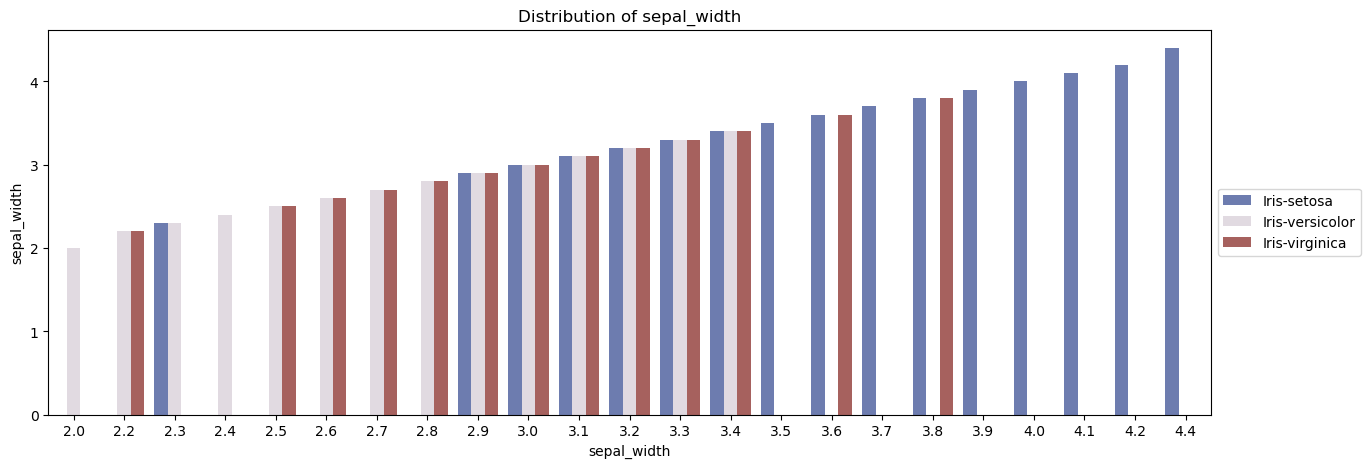

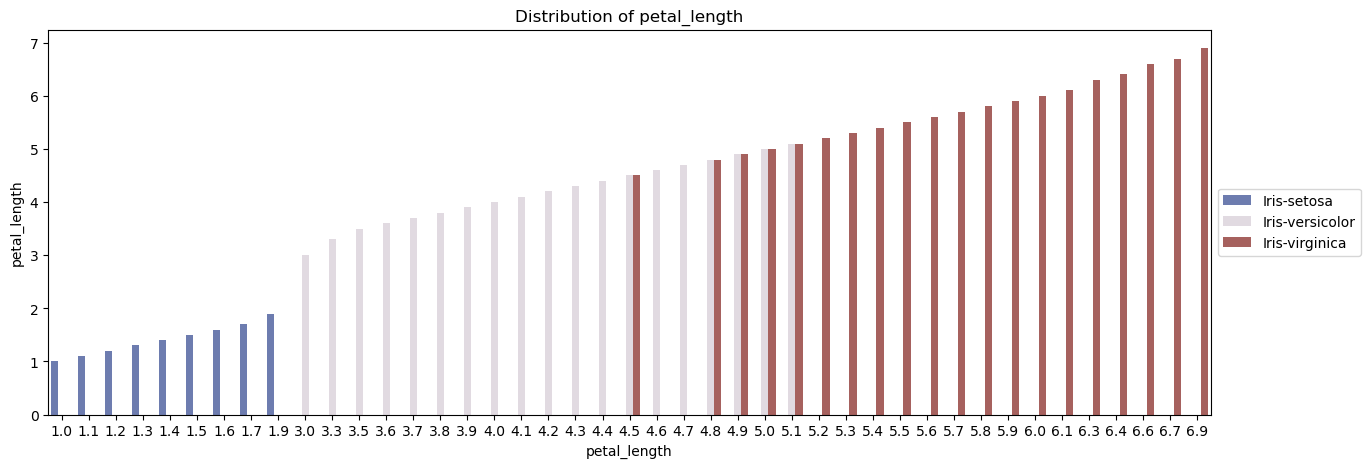

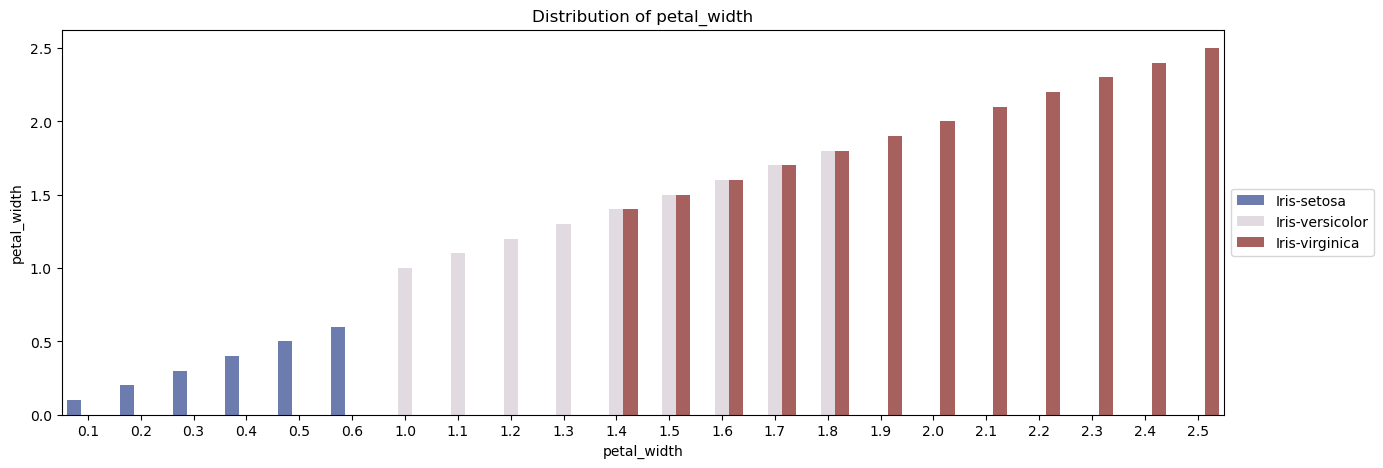

In [84]:
columns = iris.columns

for col in columns:
    if col == 'species':
        continue
    plt.figure(figsize=(15, 5))
    sns.barplot(data=iris, x=col, y=iris[col], palette=palettes[5], hue='species')
    plt.title(f'Distribution of {col}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the following graphes, we notice some intrestenting informations:
- The setosa specie is caracterised with a small sepal_length, medium to high sepad_width, very low petal width and length
- The versicolor specie is caraterised by a variation in the sepal_length, where the typically are concentrated are a medium length, same for the petal width. Concerning the petal, this specie mainly obtain a medium length and width, with some having more than average
- The virginica specie is identifiable with it's medium to significantly high setal_length, with a lot of variation when it comes to the sepal_width. On the other hand, the petal length and width for this specie is siginifcantly higher than all the other species, with some precence in the medium range

# Data cleaning

In [85]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
iris.duplicated().sum()

0

In [88]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Since we have no missing values and no duplicated one either, we dont need to perform any additional data cleaning process. Also, we have no bad formatted entries as every piece of data is either float or a string values

# Data Preprocessing

Here we can concetrate on different aspect like feature enginnering, normalisation and standerisation and many more

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Encoding data

In order for our model to properly handle our dataset, we must encode our dataset, meaning we must transform those strings values into numerical values, thus called encoding 

In [92]:
label_encoder = LabelEncoder()

In [93]:
iris['species_encoded'] = label_encoder.fit_transform(iris['species'])

In [95]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The function `label_encoder` transformed our species column into a new column encoded with values ranging from 0 to 2, <br>representing in order the following array of species ['Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2]

## Splitting the data

we need to split the data into 2 sub-dataset, one that contains only our target feature, and the other containing the other features with the target feature excluded

In [119]:
X = iris.drop(['species_encoded', 'species'], inplace = False, axis = 1)
Y = iris['species_encoded']

In [120]:
X.T

0    1    2    3    4    5    6    7    8    9    10   11   12   \
sepal_length  5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  4.4  4.9  5.4  4.8  4.8   
sepal_width   3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.0   
petal_length  1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  1.5  1.6  1.4   
petal_width   0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  0.2  0.2  0.1   

              13   14   15   16   17   18   19   20   21   22   23   24   25   \
sepal_length  4.3  5.8  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.0   
sepal_width   3.0  4.0  4.4  3.9  3.5  3.8  3.8  3.4  3.7  3.6  3.3  3.4  3.0   
petal_length  1.1  1.2  1.5  1.3  1.4  1.7  1.5  1.7  1.5  1.0  1.7  1.9  1.6   
petal_width   0.1  0.2  0.4  0.4  0.3  0.3  0.3  0.2  0.4  0.2  0.5  0.2  0.2   

              26   27   28   29   30   31   32   33   35   36   38   39   40   \
sepal_length  5.0  5.2  5.2  4.7  4.8  5.4  5.2  5.5  5.0  5.5  4.4  5.1  5.0   
sepal_width   3.4  3.5  3.4  3.2  3.1  3.4  4.1  4.2  3.2  3.5  3.0  3.4  3.5   
petal_length  1.6  1.5  1.4  1.6  1.6  1.5  1.5  1.4  1.2  1.3  1.3  1.5  1.3   
petal_width   0.4  0.2  0.2  0.2  0.2  0.4  0.1  0.2  0.2  0.2  0.2  0.2  0.3   

              41   42   43   44   45   46   47   48   49   50   51   ...  99   \
sepal_length  4.5  4.4  5.0  5.1  4.8  5.1  4.6  5.3  5.0  7.0  6.4  ...  5.7   
sepal_width   2.3  3.2  3.5  3.8  3.0  3.8  3.2  3.7  3.3  3.2  3.2  ...  2.8   
petal_length  1.3  1.3  1.6  1.9  1.4  1.6  1.4  1.5  1.4  4.7  4.5  ...  4.1   
petal_width   0.3  0.2  0.6  0.4  0.3  0.2  0.2  0.2  0.2  1.4  1.5  ...  1.3   

              100  101  102  103  104  105  106  107  108  109  110  111  112  \
sepal_length  6.3  5.8  7.1  6.3  6.5  7.6  4.9  7.3  6.7  7.2  6.5  6.4  6.8   
sepal_width   3.3  2.7  3.0  2.9  3.0  3.0  2.5  2.9  2.5  3.6  3.2  2.7  3.0   
petal_length  6.0  5.1  5.9  5.6  5.8  6.6  4.5  6.3  5.8  6.1  5.1  5.3  5.5   
petal_width   2.5  1.9  2.1  1.8  2.2  2.1  1.7  1.8  1.8  2.5  2.0  1.9  2.1   

              113  114  115  116  117  118  119  120  121  122  123  124  125  \
sepal_length  5.7  5.8  6.4  6.5  7.7  7.7  6.0  6.9  5.6  7.7  6.3  6.7  7.2   
sepal_width   2.5  2.8  3.2  3.0  3.8  2.6  2.2  3.2  2.8  2.8  2.7  3.3  3.2   
petal_length  5.0  5.1  5.3  5.5  6.7  6.9  5.0  5.7  4.9  6.7  4.9  5.7  6.0   
petal_width   2.0  2.4  2.3  1.8  2.2  2.3  1.5  2.3  2.0  2.0  1.8  2.1  1.8   

              126  127  128  129  130  131  132  133  134  135  136  137  138  \
sepal_length  6.2  6.1  6.4  7.2  7.4  7.9  6.4  6.3  6.1  7.7  6.3  6.4  6.0   
sepal_width   2.8  3.0  2.8  3.0  2.8  3.8  2.8  2.8  2.6  3.0  3.4  3.1  3.0   
petal_length  4.8  4.9  5.6  5.8  6.1  6.4  5.6  5.1  5.6  6.1  5.6  5.5  4.8   
petal_width   1.8  1.8  2.1  1.6  1.9  2.0  2.2  1.5  1.4  2.3  2.4  1.8  1.8   

              139  140  141  143  144  145  146  147  148  149  
sepal_length  6.9  6.7  6.9  6.8  6.7  6.7  6.3  6.5  6.2  5.9  
sepal_width   3.1  3.1  3.1  3.2  3.3  3.0  2.5  3.0  3.4  3.0  
petal_length  5.4  5.6  5.1  5.9  5.7  5.2  5.0  5.2  5.4  5.1  
petal_width   2.1  2.4  2.3  2.3  2.5  2.3  1.9  2.0  2.3  1.8  

[4 rows x 147 columns]

In [121]:
X.describe()

sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [122]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 147, dtype: int64

Now that we seperated our data into target and base feature, we may continue into defining the training and testing datasets

In [123]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1, shuffle=True)

## Normalisation and Standerisation

In [124]:
stdscaler = StandardScaler()

In [125]:
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.fit_transform(X_test)

# Classification models

In [129]:
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## K-Nearest Neighbors (KNN) for Classification

In [131]:
from sklearn.neighbors import KNeighborsClassifier

K-Nearest Neighbors (KNN) is a simple and versatile supervised machine learning algorithm for classification tasks. It classifies data points based on the similarity to their nearest neighbors in the feature space. Here's a breakdown of how it works:

**1. Training:**

* The KNN algorithm doesn't explicitly learn a model from the training data. Instead, it stores all the training data points.

**2. Classification:**

* When a new data point (unknown class) arrives, KNN calculates the distance between the new point and all the data points in the training set using a distance metric like Euclidean distance.
* The algorithm then identifies the **k** nearest neighbors (most similar data points) to the new point based on the calculated distances.
* KNN assigns the class label that is most frequent among these k nearest neighbors to the new data point.

**Key aspects of KNN:**

* **k**: This is a user-defined parameter that determines the number of nearest neighbors to consider during classification. Choosing the optimal k value is crucial for KNN's performance.
* **Distance Metric**: This metric defines how to measure the similarity between data points. Euclidean distance is a common choice, but other options exist depending on the data.

**Advantages of KNN:**

* **Simple and easy to understand:** KNN is a conceptually straightforward algorithm, making it easy to implement and interpret.
* **Effective for various data types:** KNN can work with various data types, including numerical and categorical data.
* **No training needed in the traditional sense:** Since KNN stores the training data, it doesn't require complex model fitting procedures.

**Disadvantages of KNN:**

* **High memory usage:** Storing all the training data can be memory-intensive for large datasets.
* **Sensitive to k**: Choosing the optimal k value can significantly impact performance. Experimentation is often needed.
* **Computationally expensive for classification:** Classifying new data points involves calculating distances to all training points, which can be slow for large datasets.

### a. Hyperparametres

The first step in setting up a model, whether for classification, clustering or anything else, is to choose the optimal hyperparameters


In [143]:
neighbors = np.arange(1,11)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [144]:
for index, i in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_accuracy[index] = knn.score(X_train, Y_train)
    test_accuracy[index] = knn.score(X_test, Y_test)
    

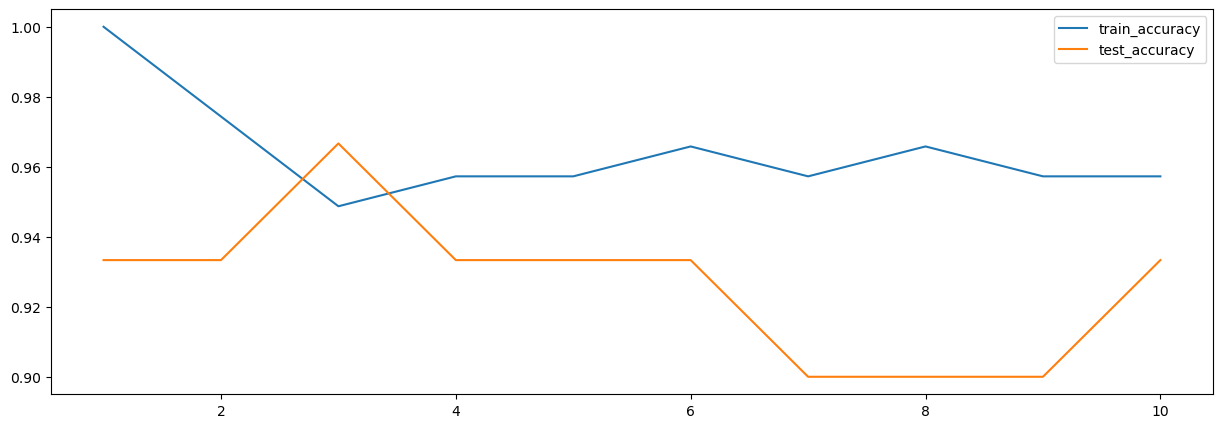

In [145]:
plt.figure(figsize = (15,5))

sns.lineplot(x = neighbors, y = train_accuracy, label = 'train_accuracy')
sns.lineplot(x = neighbors, y = test_accuracy, label = 'test_accuracy')

plt.show()

    lets take for example k = 4, we'll se if this value is optimal later on in the optimisation chapter

### Testing the model with k = 4 

In [146]:
knn = KNeighborsClassifier(n_neighbors=4)

In [147]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [148]:
knn_pred = knn.predict(X_test)

In [158]:
print('The score of the model KNN with K = 4 is : ', round(knn.score(X_test, Y_test), 4))

The score of the model KNN with K = 4 is :  0.9333


### Confusion matrix 

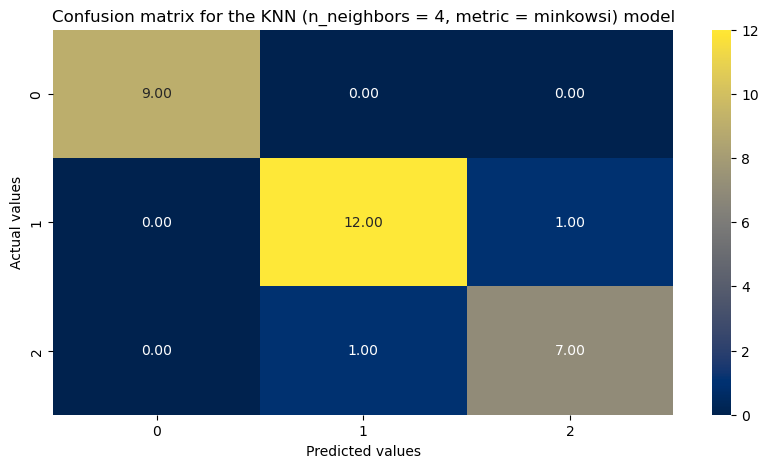

In [163]:
plt.figure(figsize = (10,5))

sns.heatmap(confusion_matrix(Y_test, knn_pred), annot = True, fmt = '.2f', cmap = palettes[8])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

plt.title('Confusion matrix for the KNN (n_neighbors = 4, metric = minkowsi) model')
plt.show()

### ROC Curve

**The ROC (Receiver Operating Characteristic) curve illustrates the performance of a binary classification model as a function of different decision thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) as the threshold for classifying positive instances varies.**

**The main aspects of the ROC curve are as follows:**

* **The curve illustrates the balance between correctly identifying positive instances (sensitivity) and correctly rejecting negative instances (specificity). Any improvement in sensitivity is generally accompanied by a decrease in specificity.**
* **Accuracy assessment:** A well-performing model will have a curve that closely follows the upper and left boundaries of the ROC space. This indicates greater overall accuracy for different threshold levels.
* **Comparison with the diagonal line:** The proximity of the curve to the 45-degree diagonal line, which represents chance, serves as an indicator of the model's discrimination ability. A closer proximity to this line indicates reduced accuracy, with the model's performance approaching that of a random guess.
* **Area Under the Curve (AUC):** The AUC quantifies the overall accuracy of the model. A higher AUC value signifies better discrimination between positive and negative instances over different thresholds, with a perfect classifier yielding an AUC of 1.

**In addition to the above, here are some other key points about ROC curves:**

* The ROC curve is a graphical representation of the trade-off between sensitivity and specificity.
* The AUC is a single-number summary of the ROC curve.
* The AUC can be used to compare the performance of different models.
* The ROC curve can be used to select a decision threshold that optimizes the performance of a model for a specific application.